In [1]:
# Imports
import os
import numpy as np
import pandas as pd

import time
import csv

import seaborn as sns
import matplotlib.pyplot as plt

from tkinter import Tk, filedialog

In [92]:
def select_file():
    root = Tk()
    root.withdraw()  # Hide the root window
    file_path = filedialog.askopenfilename(
        title="Select CSV Metadata File",
        filetypes=[("CSV files", "metadata*.csv")]
    )
    return file_path


# Request the user to select an Excel file
file_path = select_file()

directory = os.path.dirname(file_path)

In [73]:
metadata_df = pd.read_csv(file_path, header=0)

print(metadata_df)

   Num_experiments  num_nodes  noise_scale score_type MCMC_start_point  \
0               50          5          1.0   BGeScore           random   

   mcmc_iter   graph_type  dag_sparse_degree  
0     100000  erdos-renyi                  3  


In [74]:
df_MCMC = pd.read_csv(os.path.join(directory, 'MCMC_KL_results.csv'), index_col=0)
df_OM = pd.read_csv(os.path.join(directory, 'OM_KL_results.csv'), index_col=0)
df_on_accepted_only = pd.read_csv(os.path.join(directory, 'OM_KL_accepted_only_results.csv'), index_col=0)


In [75]:
quantiles = [0.05, 0.95]

MCMC_mean = df_MCMC.mean(axis=1)
MCMC_std = df_MCMC.std(axis=1)
MCMC_quantiles = df_MCMC.apply(lambda row: row.quantile(quantiles), axis=1)

OM_mean = df_OM.mean(axis=1)
OM_std = df_OM.std(axis=1)
OM_quantiles = df_OM.apply(lambda row: row.quantile(quantiles), axis=1)

OM_accepted_only_mean = df_on_accepted_only.mean(axis=1)
OM_accepted_only_mean_quantiles = df_on_accepted_only.apply(lambda row: row.quantile(quantiles), axis=1)


In [76]:
print(OM_mean[30000])
print(OM_quantiles[0.95][30000]
      )


0.0189411155333732
0.07556270210889007


<Figure size 640x480 with 0 Axes>

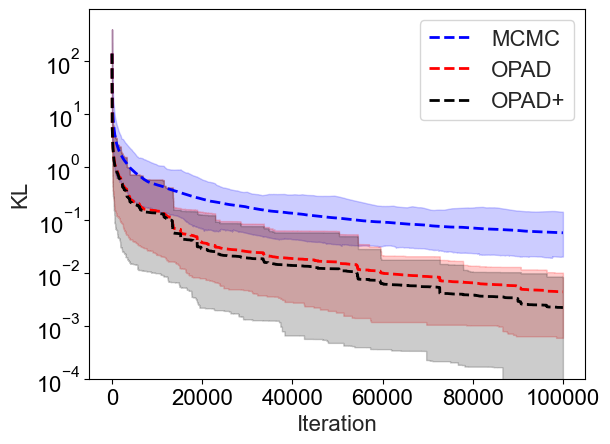

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

fontsize=16
linewidth=2

# Ensure your dataframe is available in the environment.
# Plot equivalent to plt.plot(df_OM.iloc[:,1])
sns.lineplot(data=df_OM.iloc[:, 1])

# Clear the existing plot
plt.clf()

# Create your seaborn plot
fig, ax = plt.subplots()
#fig.patch.set_facecolor('white')
ax.set_facecolor('white')
# Plot MCMC_mean
sns.lineplot(data=MCMC_mean, color='blue', label='MCMC', ax=ax, linestyle = 'dashed', linewidth=linewidth)
# Fill between MCMC quantiles
ax.fill_between(MCMC_mean.index, MCMC_quantiles[quantiles[0]], MCMC_quantiles[quantiles[1]], color='blue', alpha=0.2)

# Plot OM_mean accepted only
sns.lineplot(data=OM_accepted_only_mean, color='red', label='OPAD', ax=ax, linestyle='dashed', linewidth=linewidth)
# Fill between OM quantiles
ax.fill_between(df_on_accepted_only.index, OM_accepted_only_mean_quantiles[quantiles[0]],
                OM_accepted_only_mean_quantiles[quantiles[1]], color='red', alpha=0.2)


# Plot OM_mean
sns.lineplot(data=OM_mean, color='black', label='OPAD+', ax=ax, linestyle='dashed', linewidth=linewidth)
# Fill between OM quantiles
ax.fill_between(OM_mean.index, OM_quantiles[quantiles[0]], OM_quantiles[quantiles[1]], color='black', alpha=0.2)


# Set labels and title
#ax.set_xlim(0, metadata_df.loc[0,"mcmc_iter"])  # where x_max_value is your desired maximum value for the x-axis
ax.set_xlabel('Iteration', fontsize=fontsize)
ax.set_ylabel('KL', fontsize=fontsize)
ax.set_yscale('log')
#ax.set_xscale('log')
for spine in ax.spines.values():
    spine.set_edgecolor('black')
# Show legend
ax.legend(facecolor='white', fontsize=fontsize)
#ax.legend_.remove()
#ax.tick_params(axis='both', colors='black', direction='out',width=5, length=10)
ax.tick_params(reset=True)
ax.tick_params(axis='both', colors='black', which='both')
ax.tick_params(labelsize=fontsize)
ax.xaxis.set_tick_params(bottom=True, top=False, colors='black')
ax.yaxis.set_tick_params(left=True, right=False, colors='black')
ymin, ymax = ax.get_ylim()
ax.set_ylim([1e-4, ymax])
#plt.tight_layout()
# Save the plot
plt.savefig(os.path.join(directory,
                         f"Structure_Learning_Comparison_{int(metadata_df.loc[0, 'num_nodes'])}_dag_sparse_degree_{int(metadata_df.loc[0, 'dag_sparse_degree'])}.png"))

# Show the plot if needed
plt.show()

In [53]:
handles, labels = ax.get_legend_handles_labels()

fig_legend, ax_legend = plt.subplots(figsize=(4, 0.5))  # Adjust the size as needed

# Step 4: Add the legend to the new figure
legend = ax_legend.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=len(labels))
ax_legend.axis("off")
plt.tight_layout()

# Step 5: Save the figure as a PNG file
fig_legend.savefig("legend_only.png", dpi=300, bbox_inches='tight')
plt.close(fig_legend)